In [12]:
# !pip install webknossos

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import webknossos as wk


In [3]:
import sys, os
sys.path.append(os.getcwd())

import utils

In [ ]:
my_api_token="pU8v4Mz7qgGF0FEgQefswA"
my_url = "https://webknossos.org"
organization_id = "8632814cfac2f959"

#
datasets = ["121_lim60_tomo10a_16bit",
            "121_lim30_tomo10a_16bit",
            "21_lim30_tomo10a_16bit",
            "21_lim60_tomo10a_16bit",
            ]

# datasets = [
#     "21_lim10_tomo10a_16bit",
#     "21_lim20_tomo10a_16bit",
#     "21_lim30_tomo10a_16bit",
#     "21_lim40_tomo10a_16bit",
#     "21_lim50_tomo10a_16bit",           
#     "21_lim60_tomo10a_16bit",
# ]

In [5]:
with wk.webknossos_context(url=my_url, token=my_api_token):
    annotation_id = 'https://webknossos.org/annotations/683f3db8010000d907dc85a5#1620,701,16,0,0.062,30' #'https://webknossos.org/annotations/680ba75a0100008401cd75bd#1034,1034,95,0,2,21'
    annotation = wk.Annotation.download(annotation_id)

    print(f"Downloaded annotation: {annotation.name}")


Downloaded annotation: 121_lim60_tomo10a_16bit_beads_ATK


In [6]:

i_dataset = 0
dataset_name = datasets[i_dataset]
print(f"Dataset: {dataset_name}")


with wk.webknossos_context(url=my_url, token=my_api_token):

    dataset = wk.Dataset.open_remote(dataset_name, organization_id=organization_id)
    print(f"Opened dataset: {dataset.name}")


Dataset: 121_lim60_tomo10a_16bit
Opened dataset: 121_lim60_tomo10a_16bit


In [ ]:
annotation_points = utils.get_annotation_points(annotation)
bounding_boxes = utils.compute_bounding_boxes(annotation_points, box_size=32)

subvolumes = utils.download_subvolumes_individually(
    dataset_name=dataset_name,
    bounding_boxes=bounding_boxes,
    api_token=my_api_token,
    organization_id=organization_id,
    webknossos_url=my_url
)


In [8]:


# Save after download
file_name = f"bead_volumes_{i_dataset}.npz"
utils.save_subvolumes_to_npz(subvolumes, annotation_points, file_name)

# # Later: load without re-downloading
# subvolumes, annotation_points = load_subvolumes_from_npz("bead_volumes.npz")


Saved 30 subvolumes to bead_volumes_0.npz


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# output_path = os.path.join("/content/drive/MyDrive/projects/AKlab/", file_name)
# save_subvolumes_to_npz(subvolumes, annotation_points, output_path)


Mounted at /content/drive


In [ ]:
for i_dataset in range(len(datasets)):
    dataset_name = datasets[i_dataset]
    print(f"Dataset: {dataset_name}")

    with wk.webknossos_context(url=my_url, token=my_api_token):
        dataset = wk.Dataset.open_remote(dataset_name, organization_id=organization_id)
        print(f"Opened dataset: {dataset.name}")

    annotation_points = utils.get_annotation_points(annotation)
    bounding_boxes = utils.compute_bounding_boxes(annotation_points, box_size=32)

    subvolumes = utils.download_subvolumes_individually(
        dataset_name=dataset_name,
        bounding_boxes=bounding_boxes,
        api_token=my_api_token,
        organization_id=organization_id,
        webknossos_url=my_url
    )

    # Save after download
    file_name = f"bead_volumes_{i_dataset}_16bit.npz"
    utils.save_subvolumes_to_npz(subvolumes, annotation_points, file_name)


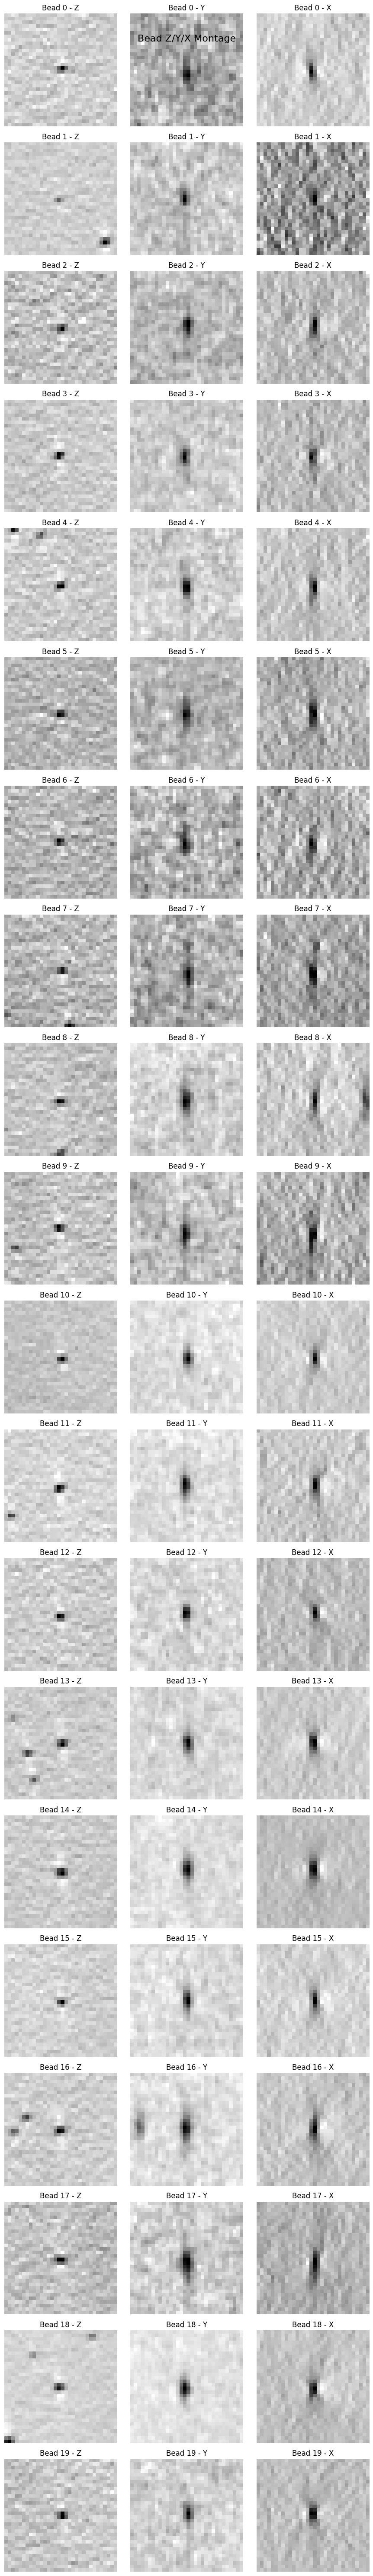

In [ ]:
utils.plot_bead_triplet_montage(subvolumes) #, title="Center Slices of Each Bead (Z, Y, X)")


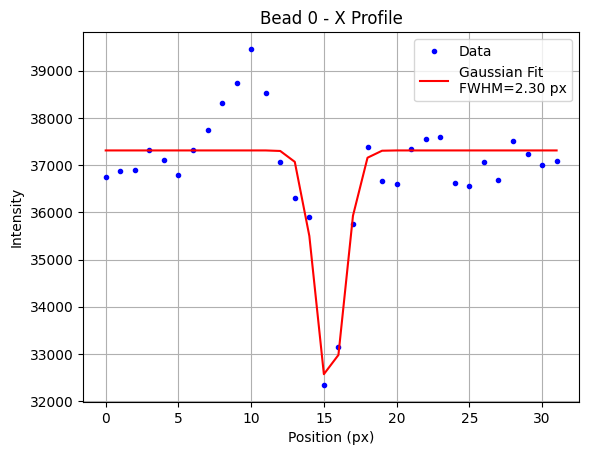

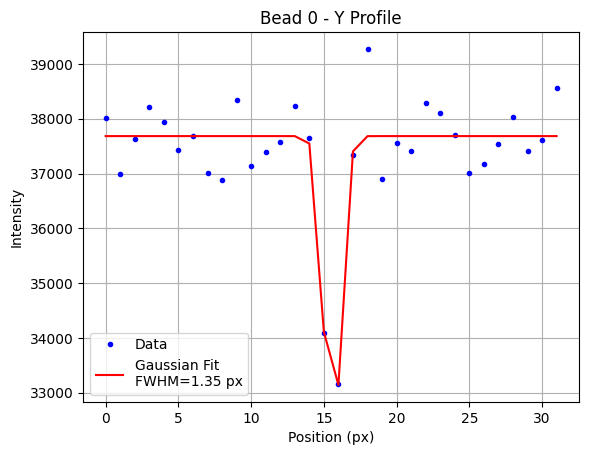

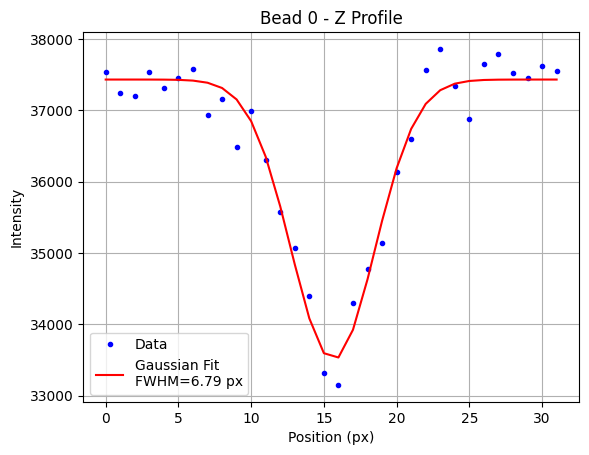

(np.float64(6.787329130643718),
 array([-3.92769620e+03,  1.56287198e+01,  2.88209305e+00,  3.74318124e+04]))

In [ ]:
# Pick a subvolume
vol = subvolumes[5]
z, y, x = vol.shape

profile_z = vol[:, y//2, x//2]
profile_y = vol[z//2, :, x//2]
profile_x = vol[z//2, y//2, :]

# Fit and plot
utils.fit_gaussian_and_compute_fwhm(profile_x, plot_fit=True, title="Bead 0 - X Profile")
utils.fit_gaussian_and_compute_fwhm(profile_y, plot_fit=True, title="Bead 0 - Y Profile")
utils.fit_gaussian_and_compute_fwhm(profile_z, plot_fit=True, title="Bead 0 - Z Profile")


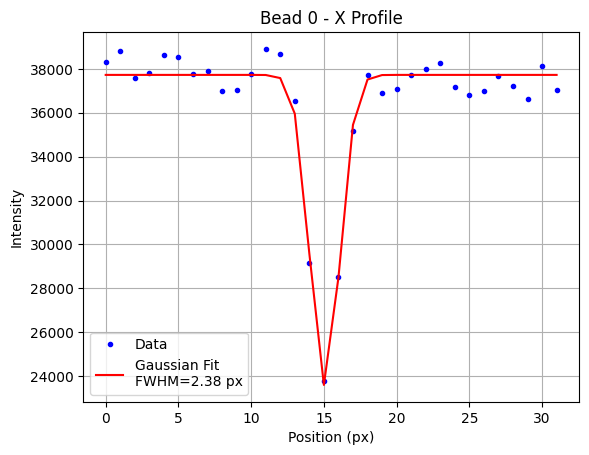

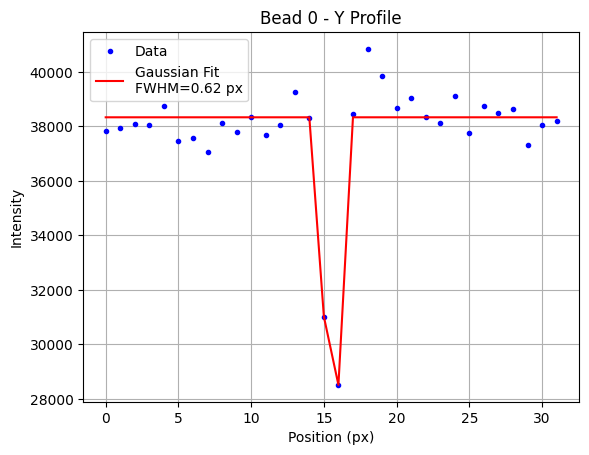

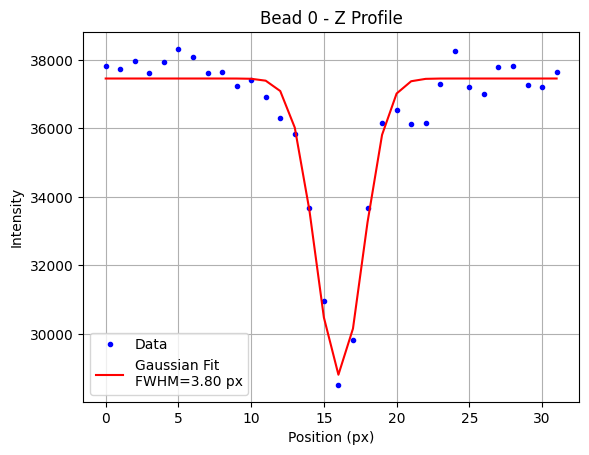

(np.float64(3.7999543599577748),
 array([-8.65328515e+03,  1.60594732e+01,  1.61356873e+00,  3.74551320e+04]))

In [ ]:
# Pick a subvolume
vol = subvolumes[18]
z, y, x = vol.shape

profile_z = vol[:, y//2, x//2]
profile_y = vol[z//2, :, x//2]
profile_x = vol[z//2, y//2, :]

# Fit and plot
fit_gaussian_and_compute_fwhm(profile_x, plot_fit=True, title="Bead 0 - X Profile")
fit_gaussian_and_compute_fwhm(profile_y, plot_fit=True, title="Bead 0 - Y Profile")
fit_gaussian_and_compute_fwhm(profile_z, plot_fit=True, title="Bead 0 - Z Profile")


In [17]:
import utils

In [21]:
all_fwhms_x = []
all_fwhms_y = []
all_fwhms_z = []

for i_dataset, dataset_name in enumerate(datasets):
    print(f"Processing dataset {i_dataset}: {dataset_name}")
    subvolumes, annotation_points = utils.load_subvolumes_from_npz(f"bead_volumes_{i_dataset}_16bit.npz")
    fwhms_x, fwhms_y, fwhms_z = utils.compute_fwhms_from_subvolumes(subvolumes)

    all_fwhms_x.append(fwhms_x)
    all_fwhms_y.append(fwhms_y)
    all_fwhms_z.append(fwhms_z)


Processing dataset 0: 121_lim60_tomo10a_16bit
Processing dataset 1: 121_lim30_tomo10a_16bit
Processing dataset 2: 21_lim30_tomo10a_16bit
Processing dataset 3: 21_lim60_tomo10a_16bit


/Users/xiu/Library/CloudStorage/OneDrive-YaleUniversity/code/AKlab/tem-tomo/bead_resolution/utils.py:205: OptimizeWarning: Covariance of the parameters could not be estimated
  p0 = [A_guess, x0_guess, sigma_guess, offset_guess]


In [28]:
out_x, out_y, out_z = utils.report_fwhm_outliers(all_fwhms_x, all_fwhms_y, all_fwhms_z)


X-axis: mean=2.40, std=1.94, outliers=3
Y-axis: mean=41.91, std=266.01, outliers=3
Z-axis: mean=18.41, std=130.24, outliers=1


Processing dataset 0: 121_lim60_tomo10a_16bit
Processing dataset 1: 121_lim30_tomo10a_16bit
Processing dataset 2: 21_lim30_tomo10a_16bit
Processing dataset 3: 21_lim60_tomo10a_16bit


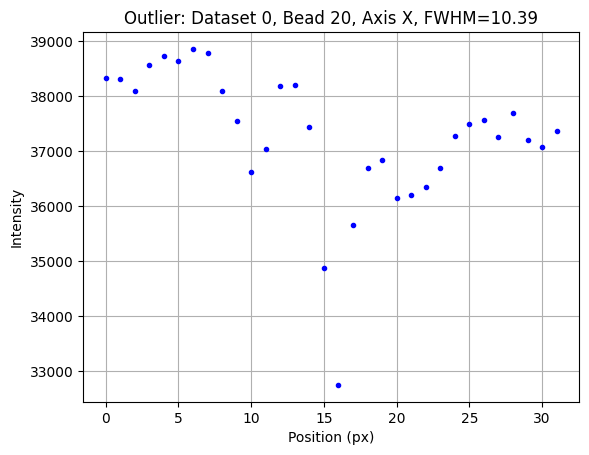

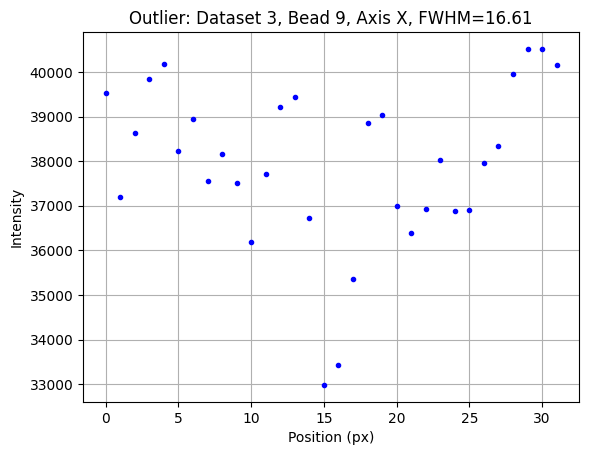

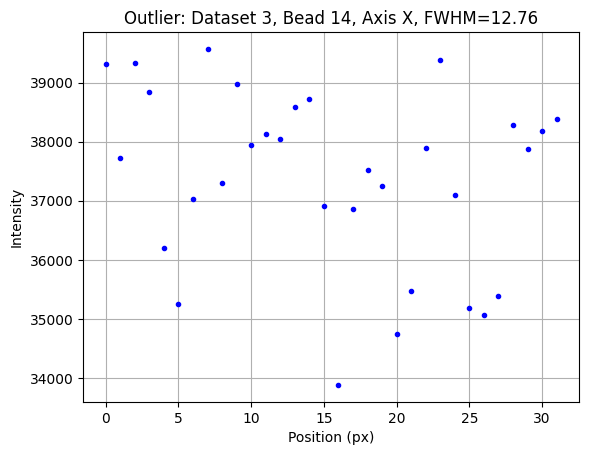

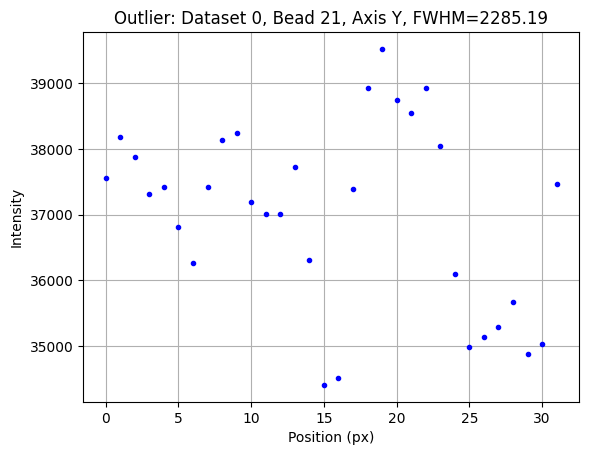

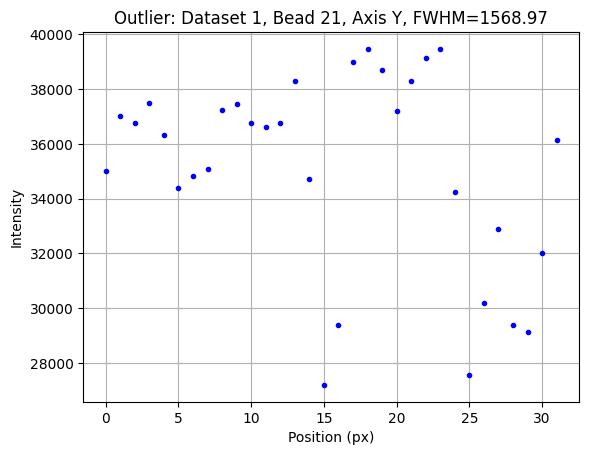

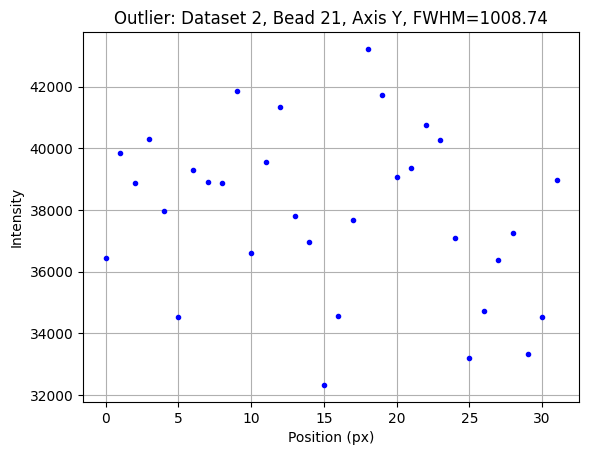

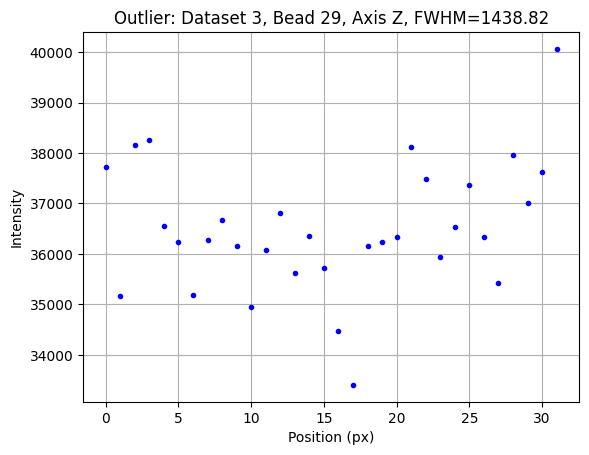

In [30]:
subvolumes_list = []
for i_dataset, dataset_name in enumerate(datasets):
    print(f"Processing dataset {i_dataset}: {dataset_name}")
    subvolumes, annotation_points = utils.load_subvolumes_from_npz(f"bead_volumes_{i_dataset}_16bit.npz")
    subvolumes_list.append(subvolumes)
    
    
utils.plot_fwhm_outliers(subvolumes_list, all_fwhms_x, 'X', out_x)
utils.plot_fwhm_outliers(subvolumes_list, all_fwhms_y, 'Y', out_y)
utils.plot_fwhm_outliers(subvolumes_list, all_fwhms_z, 'Z', out_z)

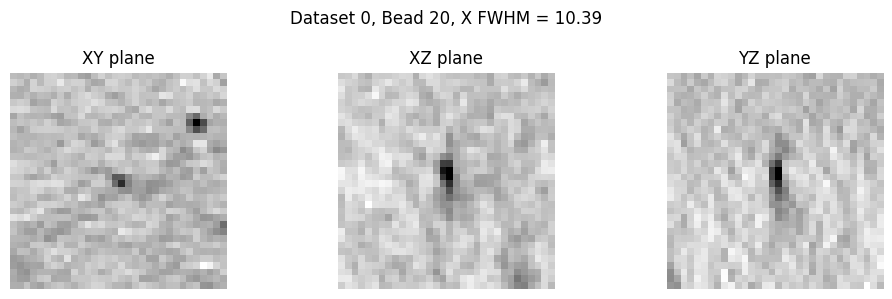

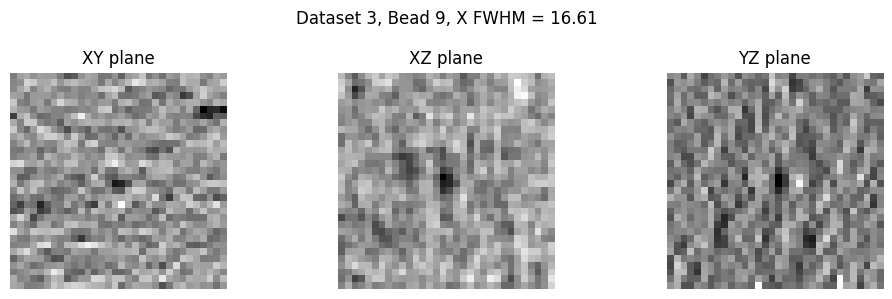

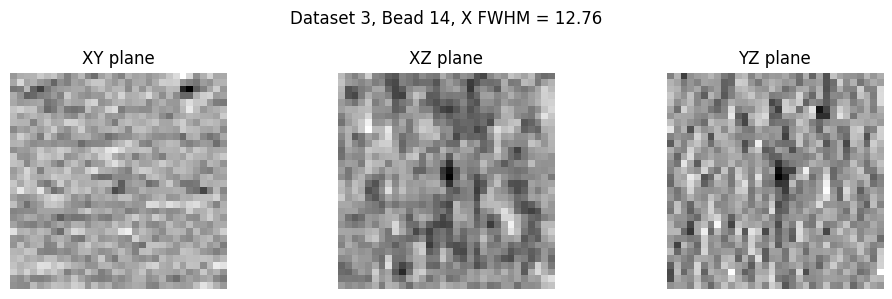

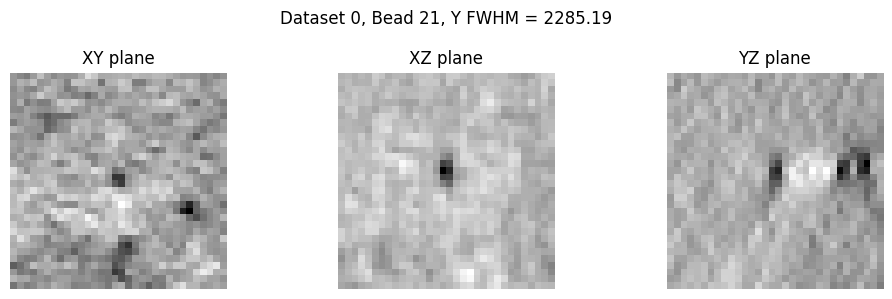

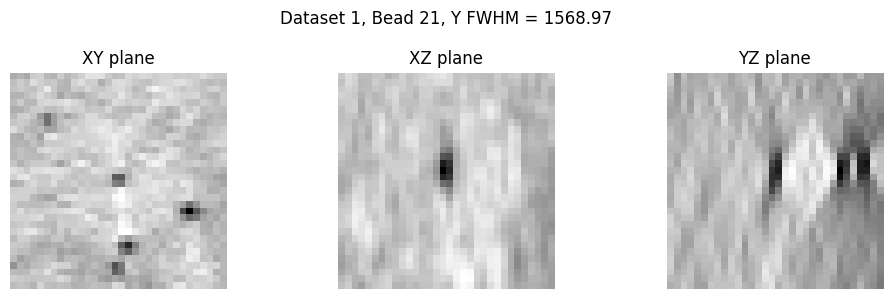

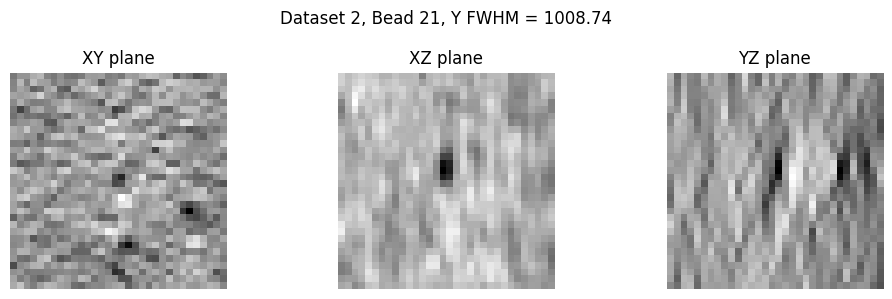

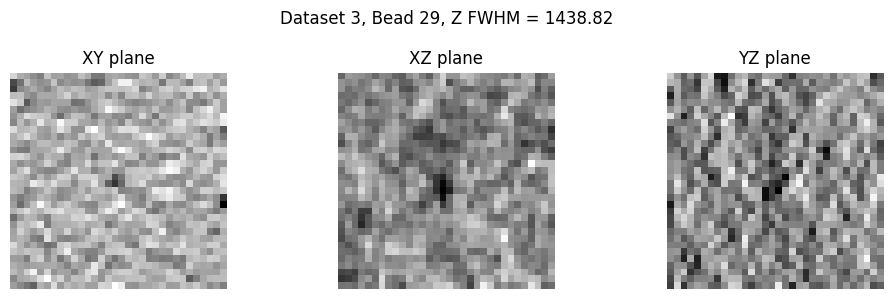

In [54]:
utils.plot_fwhm_outliers_image(subvolumes_list, out_x, axis_label='X')
utils.plot_fwhm_outliers_image(subvolumes_list, out_y, axis_label='Y')
utils.plot_fwhm_outliers_image(subvolumes_list, out_z, axis_label='Z')

In [40]:
flat_fwhms_x = np.concatenate(all_fwhms_x)
flat_fwhms_y = np.concatenate(all_fwhms_y)
flat_fwhms_z = np.concatenate(all_fwhms_z)

print("FWHM X values:", flat_fwhms_x)
print("FWHM Y values:", flat_fwhms_y)
print("FWHM Z values:", flat_fwhms_z)


FWHM X values: [ 2.22169767  1.80793706  3.0647159   2.07819301  2.04915428  2.28187421
  2.25647279  1.51787135  1.80800871  2.9582342   1.73853681  1.67733549
  1.87341871  1.86454337  2.29683412  2.40899052  2.02851847  1.89194845
  3.85790688  2.11110333 10.38621667  1.90667802  1.90111739  2.19957266
  2.43529568  2.20283693  2.00696244  1.86641825  2.14887993  2.32846509
  2.18054237  1.91982948  2.43337621  2.19145873  2.06291272  2.19312914
  2.19487215  1.54455621  1.97911392  2.27624761  1.87401005  1.66938905
  1.85427266  1.90608569  1.9245769   2.2799081   2.43800659  1.97203633
  2.11592411  2.00056667  1.81841796  1.85907326  1.88341418  2.28497148
  2.02112107  2.16849601  1.72043745  1.78604827  2.17194279  2.41492708
  2.00502577  1.94501768  2.71255873  2.11093943  1.89250426  2.35192168
  1.73564825  0.61563395  1.70212016  1.99619331  1.70187718  0.62104327
  1.69529056  1.7156772   1.66774677  1.98922598  2.51653421  1.29307604
  2.71893532  1.71156085  1.69448951

In [41]:
# Filter in-place: remove FWHM values > 100 from each sublist
all_fwhms_x = [[val for val in sublist if val <= 100] for sublist in all_fwhms_x]
all_fwhms_y = [[val for val in sublist if val <= 100] for sublist in all_fwhms_y]
all_fwhms_z = [[val for val in sublist if val <= 100] for sublist in all_fwhms_z]


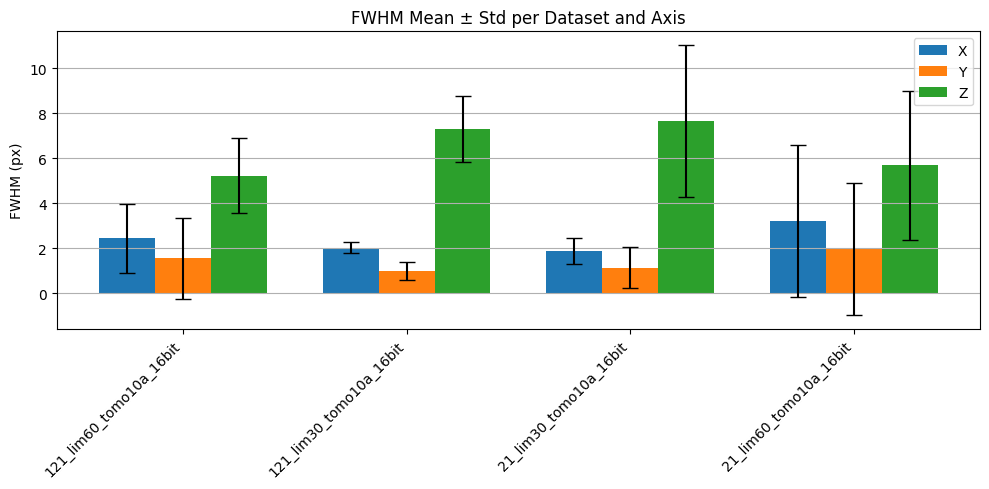

In [44]:
utils.plot_fwhm_summary_by_dataset(all_fwhms_x, all_fwhms_y, all_fwhms_z, dataset_names=datasets)


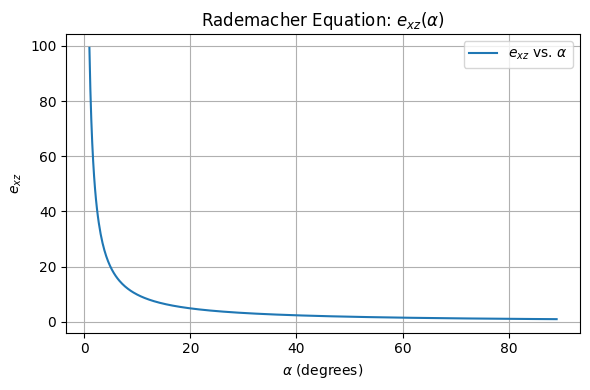

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calculate_e_xz(alpha_deg):
    alpha_rad = math.radians(alpha_deg)
    num = alpha_rad + math.sin(alpha_rad) * math.cos(alpha_rad)
    den = alpha_rad - math.sin(alpha_rad) * math.cos(alpha_rad)
    if den == 0:
        return np.nan
    return math.sqrt(num / den)

# Vectorized version for plotting
alphas = np.linspace(1, 89, 500)  # degrees
e_xz_values = [calculate_e_xz(a) for a in alphas]

plt.figure(figsize=(6, 4))
plt.plot(alphas, e_xz_values, label=r'$e_{xz}$ vs. $\alpha$')
plt.xlabel(r'$\alpha$ (degrees)')
plt.ylabel(r'$e_{xz}$')
plt.title(r'Rademacher Equation: $e_{xz}(\alpha)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [47]:
# Filter datasets and fwhm lists together to drop empty cases
filtered = [
    (name, fx, fy, fz)
    for name, fx, fy, fz in zip(datasets, all_fwhms_x, all_fwhms_y, all_fwhms_z)
    if len(fx) > 0 and len(fy) > 0 and len(fz) > 0
]

# Unpack filtered lists
datasets, all_fwhms_x, all_fwhms_y, all_fwhms_z = zip(*filtered)


In [55]:
clean_fwhms_x, clean_fwhms_y, clean_fwhms_z = utils.remove_joint_outliers(
    all_fwhms_x, all_fwhms_y, all_fwhms_z, threshold=100.0
)

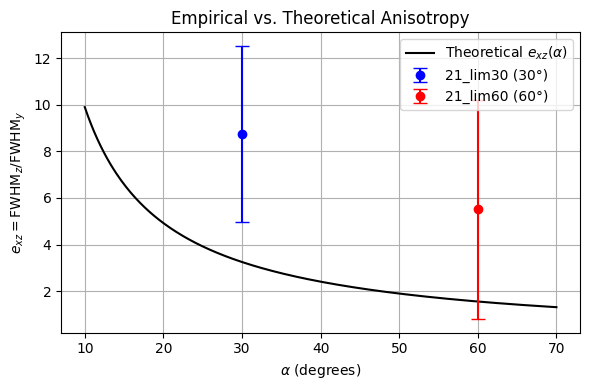

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --- Theoretical Rademacher function ---
def calculate_e_xz(alpha_deg):
    alpha_rad = math.radians(alpha_deg)
    num = alpha_rad + math.sin(alpha_rad) * math.cos(alpha_rad)
    den = alpha_rad - math.sin(alpha_rad) * math.cos(alpha_rad)
    if den == 0:
        return np.nan
    return math.sqrt(num / den)

# --- Get theoretical curve ---
alphas = np.linspace(10, 70, 300)
e_xz_theory = [calculate_e_xz(a) for a in alphas]

# --- Find indices for the two datasets ---
i_30 = [i for i, name in enumerate(datasets) if '21_lim30' in name][0]
i_60 = [i for i, name in enumerate(datasets) if '21_lim60' in name][0]

# --- Compute empirical e_xz = FWHM_z / FWHM_y per dataset ---
def empirical_ratio_and_std(fwhms_z, fwhms_y, clip_max=100.0):
    """
    Compute mean/std of FWHM_z / FWHM_y while filtering bad values:
    - removes NaNs
    - removes zero or near-zero denominators
    - clips extreme FWHMs above `clip_max`
    """
    z = np.array(fwhms_z)
    y = np.array(fwhms_y)

    # Clean both numerator and denominator
    valid_mask = (
        ~np.isnan(z) & ~np.isnan(y) &
        (y > 0.1) & (z < clip_max) & (y < clip_max)
    )
    z_clean = z[valid_mask]
    y_clean = y[valid_mask]

    if len(z_clean) == 0:
        return np.nan, np.nan

    ratios = z_clean / y_clean
    return np.nanmean(ratios), np.nanstd(ratios)


e_30_mean, e_30_std = empirical_ratio_and_std(clean_fwhms_z[i_30], clean_fwhms_y[i_30])
e_60_mean, e_60_std = empirical_ratio_and_std(clean_fwhms_z[i_60], clean_fwhms_y[i_60])

# --- Plot ---
plt.figure(figsize=(6, 4))
plt.plot(alphas, e_xz_theory, label=r'Theoretical $e_{xz}(\alpha)$', color='black')

# Overlay empirical points with error bars
plt.errorbar(30, e_30_mean, yerr=e_30_std, fmt='o', capsize=5, label='21_lim30 (30°)', color='blue')
plt.errorbar(60, e_60_mean, yerr=e_60_std, fmt='o', capsize=5, label='21_lim60 (60°)', color='red')

plt.xlabel(r'$\alpha$ (degrees)')
plt.ylabel(r'$e_{xz} = \mathrm{FWHM}_z / \mathrm{FWHM}_y$')
plt.title('Empirical vs. Theoretical Anisotropy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


In [51]:
len(all_fwhms_z[i_30])

30

In [52]:
len(all_fwhms_y[i_30])

29

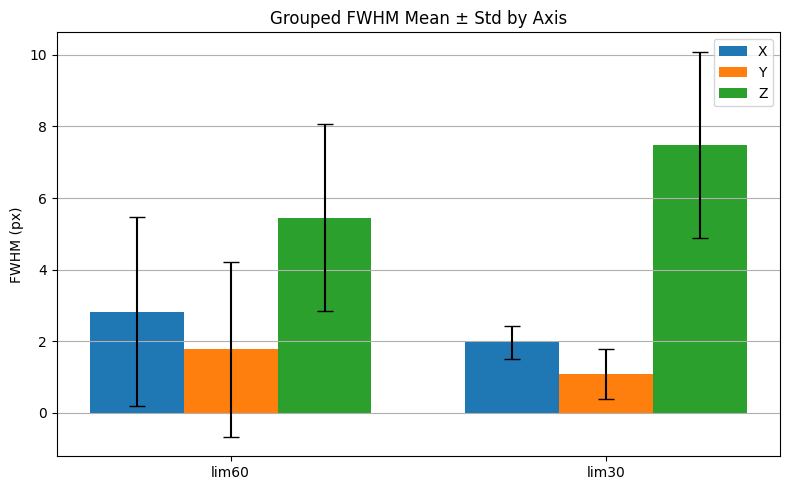

In [ ]:
# group_labels = {
#     'lim60': ['lim60'],
#     'lim30': ['lim30']
# }

# utils.plot_fwhm_summary(
#     all_fwhms_x, all_fwhms_y, all_fwhms_z,
#     dataset_names=datasets,
#     group_labels=group_labels
# )


In [ ]:
fwhms_z = []
fwhms_y = []
fwhms_x = []

for i, vol in enumerate(subvolumes):
    z, y, x = vol.shape

    profile_z = vol[:, y//2, x//2]
    profile_y = vol[z//2, :, x//2]
    profile_x = vol[z//2, y//2, :]

    fwhm_z, _ = utils.fit_gaussian_and_compute_fwhm(profile_z)
    fwhm_y, _ = utils.fit_gaussian_and_compute_fwhm(profile_y)
    fwhm_x, _ = utils.fit_gaussian_and_compute_fwhm(profile_x)

    fwhms_z.append(fwhm_z)
    fwhms_y.append(fwhm_y)
    fwhms_x.append(fwhm_x)


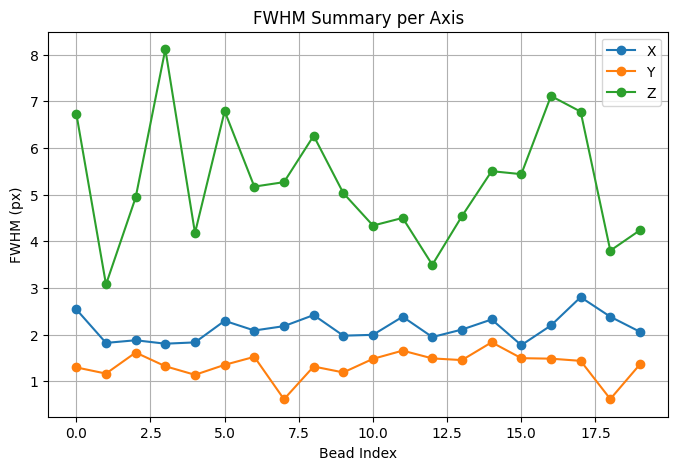

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fwhms_x, 'o-', label='X')
plt.plot(fwhms_y, 'o-', label='Y')
plt.plot(fwhms_z, 'o-', label='Z')
plt.xlabel('Bead Index')
plt.ylabel('FWHM (px)')
plt.title('FWHM Summary per Axis')
plt.grid(True)
plt.legend()
plt.show()
